In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
X, y = load_boston(return_X_y=True)
boston = datasets.load_boston()

/Users/ashleyxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

## Step 1 Split the dataset into training and test sets (80, 20).

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [4]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (404, 13)
Shape of X_test:  (102, 13)
Shape of y_train:  (404,)
Shape of y_test (102,)


## Step 2(a) Use all the features (1-13) to fit the linear regression model for feature 14 using the training set.

In [5]:
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

## Step 2(b) Report the coefficients, mean squared error and variance score for the model on the test set.

In [6]:
cdf = pd.DataFrame(regressor_linear.coef_, columns=['Coefficients'])
print(cdf)

    Coefficients
0      -0.100672
1       0.044369
2       0.050913
3       0.581274
4     -18.123572
5       4.450598
6      -0.003003
7      -1.437984
8       0.289746
9      -0.014084
10     -0.964187
11      0.008279
12     -0.465422


In [7]:
y_pred_linear_test = regressor_linear.predict(X_test)
print('Mean squared error:  %.2f' % np.mean((y_pred_linear_test, y_test)))
print('Variance score:  %.2f' % regressor_linear.score(X_test, y_test))

Mean squared error:  22.13
Variance score:  0.66


## Step 3(b) Report the coefficient, mean squared error and variance score for the model on the test set. Also report the thirteen plots of the linear regression models generated on each feature. Each plot should distinctly show the training points, test points and the linear regression line.

In [8]:
# Function to generate the report
def generate_report(X_train, y_train):
    coefficients = []
    mean_sqaured_error = []
    variances = []
    for i in range(13):
        regressor_linear = LinearRegression()
        regressor_linear.fit(X_train[:, [i]].reshape(-1, 1), y_train)
        y_pred_linear_test = regressor_linear.predict(X_test[:, [i]])
        # calcualte coeffiecent, mean squared error, and variance score
        coefficient = regressor_linear.coef_[0]
        mean_sqaure = np.mean((y_pred_linear_test, y_test))
        variance = regressor_linear.score(X_test[:, [i]], y_test)

        # add to the array
        coefficients.append(coefficient)
        mean_sqaured_error.append(mean_sqaure)
        variances.append(variance)
        
        plt.scatter(X_test[:, [i]].reshape(-1), y_test, color="black")
        plt.scatter(X_train[:, [i]].reshape(-1), y_train, color="red")
        plt.plot(X_test[:, [i]].reshape(-1), y_pred_linear_test, color="blue", linewidth=3)

        plt.xticks(())
        plt.yticks(())
        plt.title("linear regression line of "+ boston.feature_names[i])

        plt.show()
    return coefficients, mean_sqaured_error, variances
        

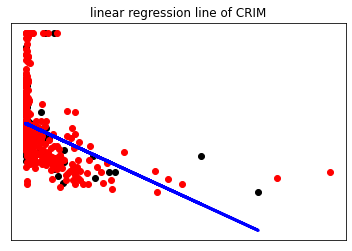

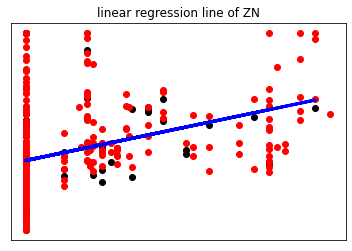

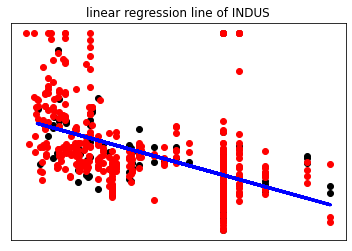

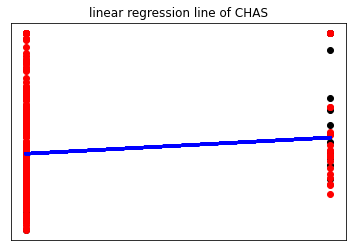

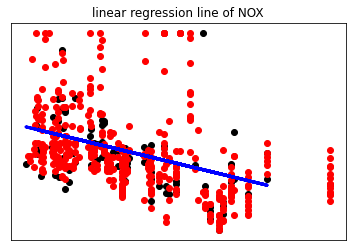

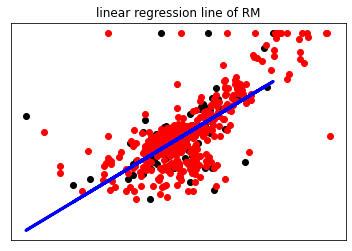

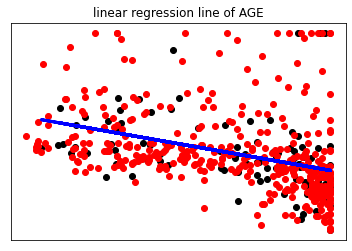

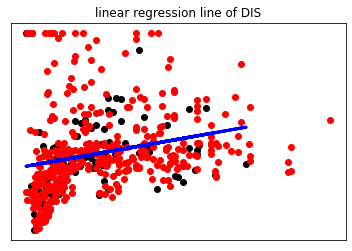

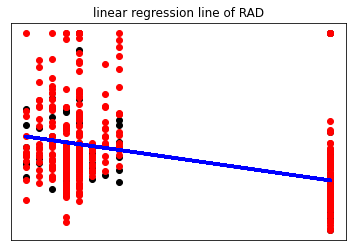

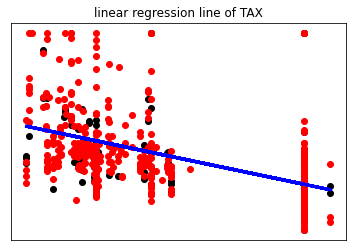

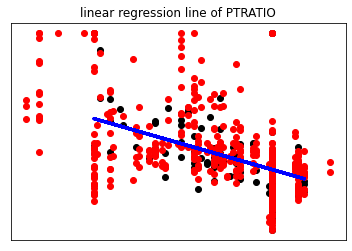

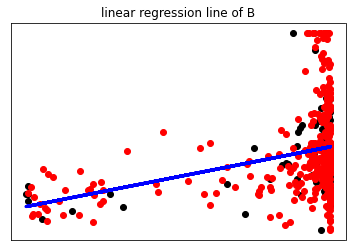

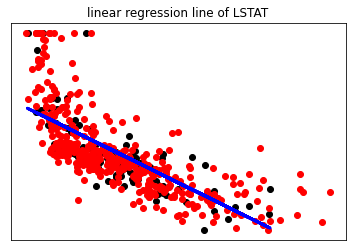

In [9]:
# Red represents the training points, black represents test points
coefficients, mean_sqaured_error, variances = generate_report(X_train, y_train)

In [10]:
print(coefficients)

[-0.4459104788953146, 0.1447903836096456, -0.7047508186480572, 3.6850547358400765, -34.497137495490584, 9.516463926138865, -0.12539690802719755, 1.1200300243119075, -0.43522773576413337, -0.027645155258567117, -2.1078269845578026, 0.03433888686380006, -0.9439047760658422]


In [11]:
print(mean_sqaured_error)

[22.36127796478277, 22.14117486396556, 22.071809696919203, 22.49087852656531, 22.527768434992826, 21.641192787410322, 22.214908142347, 22.189940553971876, 22.383209047972258, 22.28529768476891, 22.063451184838726, 22.351267346678558, 22.39354358166983]


In [12]:
print(variances)

[0.10600012291925243, 0.08117643080080084, 0.07362654145255632, 0.10855500995019263, 0.1230895569097391, 0.23967998438522564, 0.13514466414633008, 0.03670066276983763, 0.048293751041251776, 0.0776714226197166, 0.27622910947177215, 0.12310520950371817, 0.5777827152540531]


In [13]:
relationships = []
relationships.append(coefficients)
relationships.append(mean_sqaured_error)
relationships.append(variances)

In [14]:
regressor_linear = LinearRegression()
regressor_linear.fit(X_train[:, [0]].reshape(-1, 1), y_train)
y_pred_linear_test = regressor_linear.predict(X_test[:, [0]])

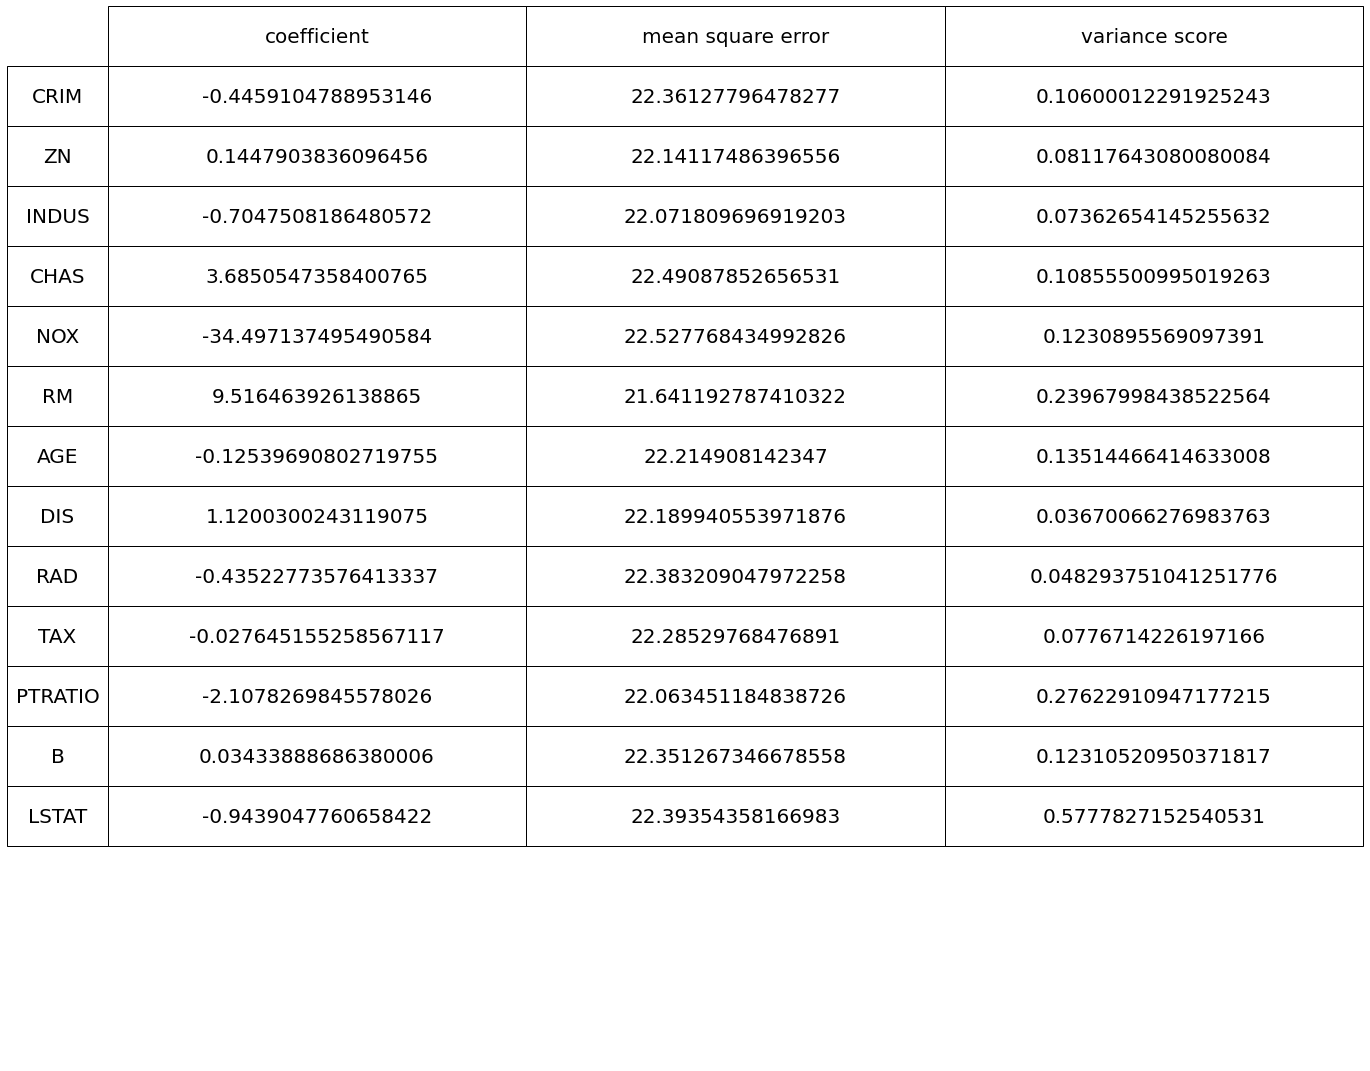

In [15]:

dc = pd.DataFrame(relationships).T
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText = dc.values,
                 colWidths = [0.25]*len(dc.columns),
          colLabels =['coefficient', 'mean square error', 'variance score'],
          rowLabels = boston.feature_names,
          cellLoc = 'center', rowLoc = 'center',
          loc='top')
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(5,5)

plt.show()



## Step 4(a) Perform 10 iterations of (Step 1, Step 2(a), and Step 3(a)).

In [16]:
# Run 10 iterations
def run_iterations():
    mean_sqaured_error = []
    variances = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
        
        # for each feature
        for i in range(13):
            regressor_linear = LinearRegression()
            regressor_linear.fit(X_train[:, [i]].reshape(-1, 1), y_train)
            y_pred = regressor_linear.predict(X_test[:, [i]])
            
            # calcualte mean squared error and variance score
            mean_sqaure = np.mean((y_pred, y_test))
            variance = regressor_linear.score(X_test[:, [i]], y_test)

            # add to the array
            mean_sqaured_error.append(mean_sqaure)
            variances.append(variance)
            
        # with all features
        regressor_linear = LinearRegression()
        regressor_linear.fit(X_train, y_train)
        y_pred = regressor_linear.predict(X_test)
        mean_sqaured_error.append(np.mean((y_pred, y_test)))
        variances.append(regressor_linear.score(X_test, y_test))
    return mean_sqaured_error, variances

In [17]:
# ten iterations arrays
mean_sqaured_error, variances = run_iterations()

In [18]:
reshaped_mean_sqaured_error = np.array(mean_sqaured_error).reshape(10, -1)
reshaped_variances = np.array(variances).reshape(10, -1)

In [19]:
avreage_mean_sqaured_error = reshaped_mean_sqaured_error.mean(axis=0)
avreage_variancess = reshaped_variances.mean(axis=0)

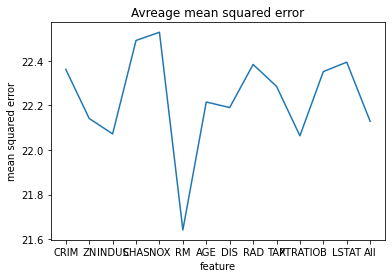

In [20]:
# Plot avreage mean sqaured error
x = np.arange(0, 14)

features = boston.feature_names
cols = np.append(features, "All")

plt.plot(avreage_mean_sqaured_error) 
plt.title("Avreage mean squared error") 


plt.xlabel("feature") 
plt.ylabel("mean squared error") 
plt.xticks(x, cols.tolist())

plt.show()

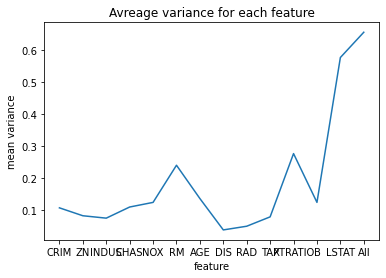

In [21]:
# Plot avreage variances
x = np.arange(0, 14)

features = boston.feature_names
cols = np.append(features, "All")

plt.plot(avreage_variancess) 
plt.title("Avreage variance for each feature") 


plt.xlabel("feature") 
plt.ylabel("mean variance") 
plt.xticks(x, cols.tolist())

plt.show()

## 1. Based upon the linear models you generated, which feature appears to be most predictive for the target feature? Note that you can answer this question based upon the output provided for the linear models.

Based on the linear models generated above, LSTAT appears to be the most predictive.

However, RM, PTRATIO,NOX are predictive according to the regression line as well.

## 2. Suppose you need to select two features for a linear regression model to predict the target feature. Which two features would you select? Why?

I'll choose LSTAT since it gives the most accurate linear regression line where most points are near the line.

I'll choose RM as well, since it has lowest average mean squared error, the regression line is predictive too.

## 3. Examine all the plots and numbers you have, do you have any comments on them? Do you find any surprising trends? Do you have any idea about what might be causing this surprising trend in the data? This is a descriptive question meant to encourage you to interpret your results and express yourself.

Comments:
1. Mean variances is highest if we run the metric with all features.
2. Each iteration may have slightly different results.
3. It's more intuitive to see the accuracy of the predictions regression line plots for each feature with both training and testing datapoints.